# Testing

In [3]:
library(network)

ERROR: Error in library(network): there is no package called ‘network’


# Script 06, Section 4.1 Replication

In [39]:
# loading elite data
load("Barbera/elites-data.Rdata")
# loading elite estimates
load("Barbera/results-elites-US.rdata")
results$merge <- tolower(results$screen_name)
# merging data
d <- merge(elites.data[['US']], results, by="merge")

# normalizing elite estimates
# load("Barbera/estimates-US.rdata") # This file is not included in the replication materials, comes from script 05b which I can't replicate
# the results df file does not have a theta feature. estimates-US.rdata replaces the previous results file and does have a theta parameter. 
# phi = estimate from script 04, the first stage of the model and theta = results from script 05, the second stage of the model. 
d$phi <- (d$phi - mean(results$theta)) / sd(results$theta) 


## keeping only congress
d <- d[d$title %in% c("House", "Senate"),]


Warning message in mean.default(results$theta):
“argument is not numeric or logical: returning NA”


In [44]:
# idealPoint = DW NOMINATE scores
# phi = spatial following model score
head(d)

,merge,id,screen_name.x,verified,url,created_at,name,followers_count,location,description,⋯,nameid,title,party,state,gender,idealPoint,screen_name.y,phi,phi.sd,alpha
,<chr>,<int>,<chr>,<lgl>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1,alangrayson,41017380,AlanGrayson,FALSE,http://graysonforcongress.com,Tue May 19 01:00:40 +0000 2009,Alan Grayson,32086,"Orlando, FL",,⋯,G000556,House,D,NA,NA,NA,AlanGrayson,NA,0.04288401,-0.1852545
2,alfranken,7334402,alfranken,TRUE,http://www.alfranken.com/,Sun Jul 08 21:48:38 +0000 2007,Al Franken,100863,Minnesota,Official TeamFranken Twitter feed,⋯,NA,Senate,D,NA,NA,NA,alfranken,NA,0.03569087,0.7845777
4,allenwest,237403203,AllenWest,TRUE,http://west.house.gov,Wed Jan 12 19:27:31 +0000 2011,Allen West,98740,"Washington, D.C.",I am a Congressman from the great state of Florida. I represent parts of Broward County and Palm Beach County in the 22nd District.,⋯,W000807,House,R,FL,M,0.8028769,AllenWest,NA,0.03800505,1.8806434
5,arturdavis,19677673,ArturDavis,TRUE,http://officialarturdavis.com,Wed Jan 28 21:35:52 +0000 2009,Artur Davis,10657,Alabama,,⋯,D000602,House,D,NA,NA,NA,ArturDavis,NA,0.05642765,-2.3804216
6,askgeorge,7356562,askgeorge,TRUE,http://house.gov/georgemiller,Mon Jul 09 22:04:23 +0000 2007,Rep.George Miller,7955,Washington DC/East Bay CA,"Representing Contra Costa and Solano in Congress. Top priority = creating new jobs. Also, avid reader and hiker.",⋯,M000725,House,D,CA,M,-1.3461789,askgeorge,NA,0.07866799,-3.3786690
7,barackobama,813286,BarackObama,TRUE,http://www.barackobama.com,Mon Mar 05 22:08:25 +0000 2007,Barack Obama,21474985,"Washington, DC",This account is run by #Obama2012 campaign staff. Tweets from the President are signed -bo.,⋯,O000167,Senate,D,NA,NA,NA,BarackObama,NA,0.03182341,3.5082174


In [45]:
head(results)

,screen_name,phi,phi.sd,alpha,merge
,<chr>,<dbl>,<dbl>,<dbl>,<chr>
phi[1],BarackObama,-1.51442170,0.03182341,3.5082174,barackobama
phi[2],nytimes,-0.87920476,0.01850573,1.0744656,nytimes
phi[3],Schwarzenegger,-0.03773341,0.05166358,-2.9864033,schwarzenegger
phi[4],algore,-1.33198070,0.03150586,-0.1919637,algore
phi[5],maddow,-1.98173386,0.03618331,3.6190372,maddow
phi[6],FoxNews,1.25326182,0.02402766,1.7987397,foxnews


# Script 07, Section 4.2 Replication

### Ideal Point Distribution Plots

In [114]:
source('Barbera/functions.R')
library(ggplot2)
library(scales)
library(grid)
library(gridExtra)

## loading user estimates and data
load("Barbera/users-data-US.rdata")

df1 <- users[users$type!="NA", c("theta", "type")]
df1$facet <- "Mass Ideal Points"

## adding elite estimates
load("Barbera/results-elites-US.rdata")
results$type <- "Political Actors"
users$type <- "Ordinary Users"
names(results)[2] <- 'theta'

df2 <- rbind(users[,c("theta", "type")],
        results[,c("theta", "type")])

df2$facet <- 'Elite and Mass Ideal Points'


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




Warning message:
“Removed 112 rows containing non-finite values (stat_density).”


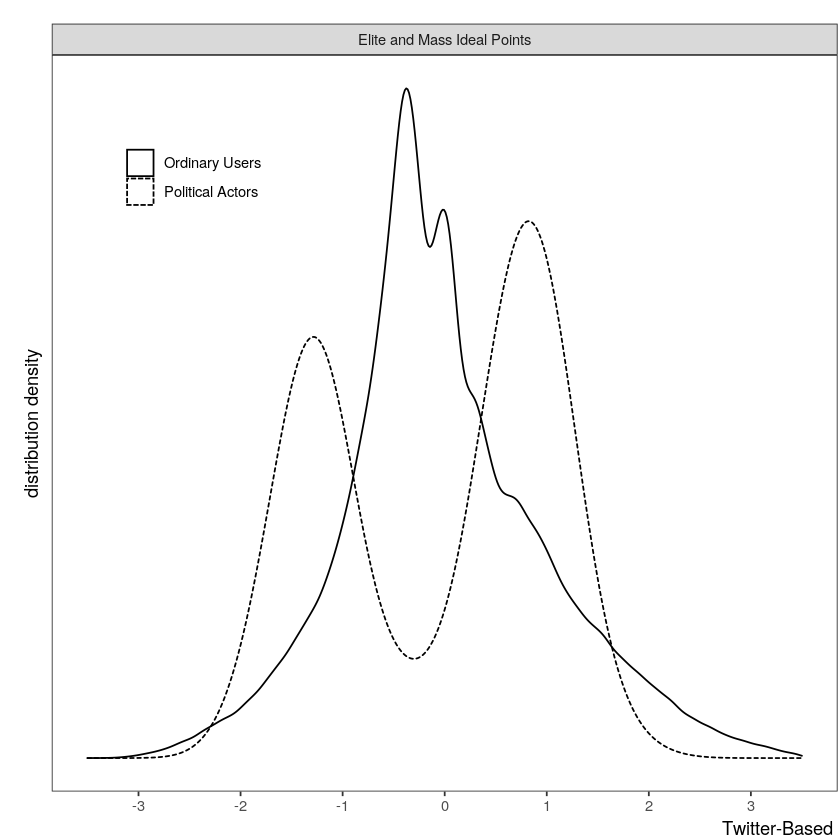

In [143]:
p <- ggplot(df2, aes(x=theta, linetype=type))
pq1 <- p + geom_density() + facet_wrap(~facet, nrow=1) + scale_y_continuous("distribution density") +
        scale_x_continuous("Twitter-Based ", breaks=seq(-3,3,1), limits=c(-3.5, 3.5)) + theme_bw() +
        scale_linetype_discrete("Group") + 
        theme(axis.line.y=element_blank(), axis.ticks.y=element_blank(), axis.text.y=element_blank(),
            #axis.ticks.x=element_blank(), axis.text.x=element_blank(),
            axis.title.x=element_text(hjust=1), # changed theme_text() to element_text()
             plot.margin=unit(c(0.5, 0.05, 0, 0.5), "cm"), panel.grid.major = element_blank(),
            panel.grid.minor = element_blank(), legend.position=c(0.18,.84), legend.title=element_blank())
pq1

In [117]:
ggsave("elite-mass density.png", plot = pq1)

Saving 6.67 x 6.67 in image

Warning message:
“Removed 112 rows containing non-finite values (stat_density).”


Warning message:
“Removed 14 rows containing non-finite values (stat_density).”


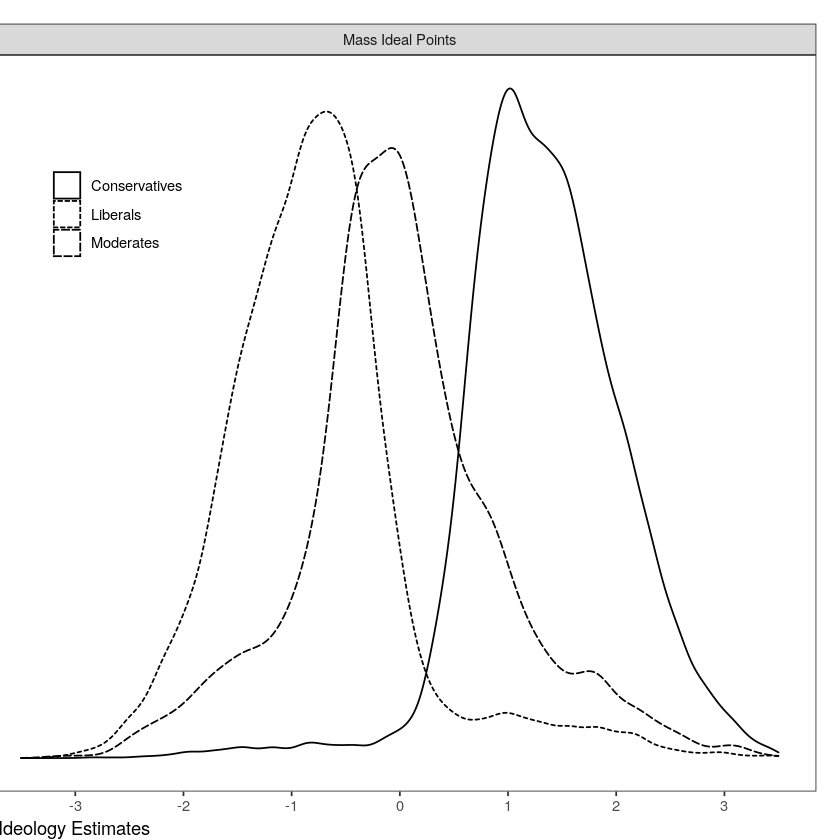

In [146]:
p <- ggplot(df1, aes(x=theta, linetype=type))
pq2 <- p + geom_density() + facet_wrap(~facet, nrow=1) + scale_y_continuous("distribution density") +
        scale_x_continuous("   Ideology Estimates", breaks=seq(-3,3,1), limits=c(-3.5, 3.5)) + theme_bw() +
        scale_linetype_discrete("Group") + 
        theme(axis.line.y=element_blank(), axis.title.y=element_blank(),
            axis.ticks.y=element_blank(), axis.text.y=element_blank(),
            #axis.ticks.x=element_blank(), axis.text.x=element_blank(), 
            axis.title.x=element_text(hjust=0), 
             plot.margin=unit(c(0.5, 0.5, 0, -.45), "cm"), panel.grid.major = element_blank(),
            panel.grid.minor = element_blank(), legend.position=c(0.16,.79), legend.title=element_blank())
pq2

In [119]:
ggsave("ideology density.png", plot = pq2)

Saving 6.67 x 6.67 in image

Warning message:
“Removed 14 rows containing non-finite values (stat_density).”


Warning message:
“Removed 112 rows containing non-finite values (stat_density).”
Warning message:
“Removed 14 rows containing non-finite values (stat_density).”


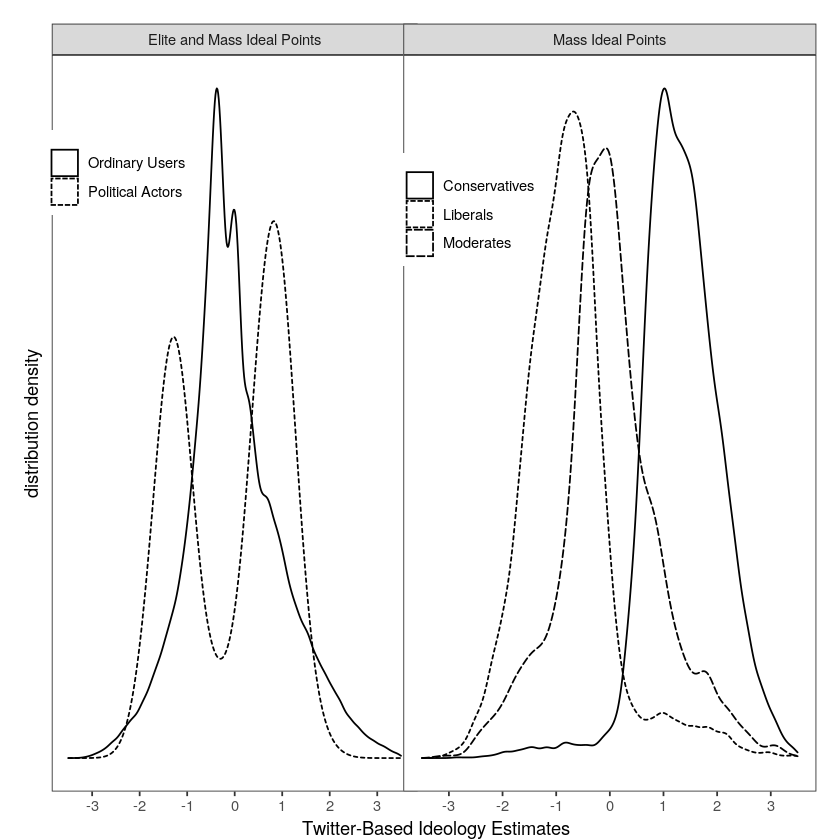

In [147]:
pq3 <- grid.arrange(pq1, pq2, nrow = 1, ncol = 2)
ggsave("density grid.png", plot = pq3, width = 9, height = 4.5)

### Ideology by State and Correlations

In [13]:
# loading public opinion data
load("Barbera/state-data.rdata")

# loading user data
load("Barbera/users-data-US.rdata")

# normalizing estimates
users$theta <- (users$theta - mean(users$theta))/sd(users$theta)

# keeping only users with a state
users <- users[users$state %in% state.name,]

# computing confidence intervals for each state
med <- aggregate(users$theta, by=list(state=users$state), median)
lo <- aggregate(users$theta, by=list(state=users$state), quantile, prob=0.025)
hi <- aggregate(users$theta, by=list(state=users$state), quantile, prob=0.975)

df <- merge(med, lo, by="state")
df <- merge(df, hi, by="state")
names(df)[2:4] <- c("value", "lo", "hi")

# merging with state-level data
state.data <- merge(state.data, df)

## correlations reported in paper
cor(state.data$value, state.data$opinion)
cor(state.data$value, state.data$obama)

[1] -0.8767605

[1] -0.7847936

# Script 08, Section 4.3 Replication

In [15]:
source('Barbera/functions.R')
library(ggplot2)
library(scales)
library(grid)

## loading user estimates and data
load("Barbera/users-data-US.rdata")

## loading Ohio data
load("Barbera/contributor-data.rdata")

## merging
contr <- merge(contr, users)

## category
contr$cat <- "Both parties"
contr$cat[contr$amount_dem>0 & contr$amount_rep==0] <- "Only Democrats"
contr$cat[contr$amount_dem==0 & contr$amount_rep>0] <- "Only Republicans"

In [16]:
table(contr$theta>0)
tab <- table(contr$theta>0, contr$cat)
(tab["TRUE", "Both parties"] + tab["TRUE", "Only Republicans"]) / sum(tab["TRUE",])
(tab["FALSE", "Both parties"] + tab["FALSE", "Only Democrats"]) / sum(tab["FALSE",])
cor(contr$theta, contr$cfscore, use='complete.obs')


FALSE  TRUE 
 1649  1058 

[1] 0.8969754

[1] 0.9818072

[1] 0.7980097

### Figure 5 Data Prep and Plot

In [148]:
## loading user estimates and data
load("Barbera/users-data-US.rdata")

## loading Ohio data
load("Barbera/ohio-data.rdata")

## merging
ohio <- merge(ohio.data, users)

## preparing variables
ohio$party <- "Not registered"
ohio$party[ohio$PARTY_AFFILIATION=="D"] <- "Registered DEM"
ohio$party[ohio$PARTY_AFFILIATION=="R"] <- "Registered REP"

sum.regs <- apply(ohio[,4:42], 1, function(x) sum(x %in% "D") - sum(x %in% "R"))
ohio$sum.regs <- sum.regs

### categorical variable times registered for each party
ohio$regs.cat <- NA
ohio$regs.cat[ohio$sum.regs<(-5)] <- "<-5"
ohio$regs.cat[ohio$sum.regs<=(-3) & ohio$sum.regs>=(-5)] <- "[-3,-5]"
ohio$regs.cat[ohio$sum.regs==(-2)] <- "-2"
ohio$regs.cat[ohio$sum.regs==(-1)] <- "-1"
ohio$regs.cat[ohio$sum.regs==(0)] <- "0"
ohio$regs.cat[ohio$sum.regs==(2)] <- "+2"
ohio$regs.cat[ohio$sum.regs==(1)] <- "+1"
ohio$regs.cat[ohio$sum.regs>(5)] <- ">+5"
ohio$regs.cat[ohio$sum.regs>=(3) & ohio$sum.regs<=(5)] <- "[+3,+5]"
ohio$regs.cat <- factor(ohio$regs.cat, levels=c("<-5", "[-3,-5]", "-2",
    "-1", "0", "+1", "+2", "[+3,+5]", ">+5"))

## combining both datasets before plotting
plotdata <- ohio[,c("uid", "theta", "regs.cat")]
names(plotdata) <- c("uid", "estimates", "x")
plotdata$facet <- "Registration History"

plotdata <- rbind(plotdata, data.frame("uid"=ohio$uid, "estimates"=ohio$theta, x=ohio$party,
    facet="2012"))
plotdata <- plotdata[plotdata$x %in% "Not registered" == FALSE,]
levels(plotdata$x)[c(11,12)] <- c("Dem.", "Rep.")


Warning message:
“Removed 91 rows containing non-finite values (stat_boxplot).”


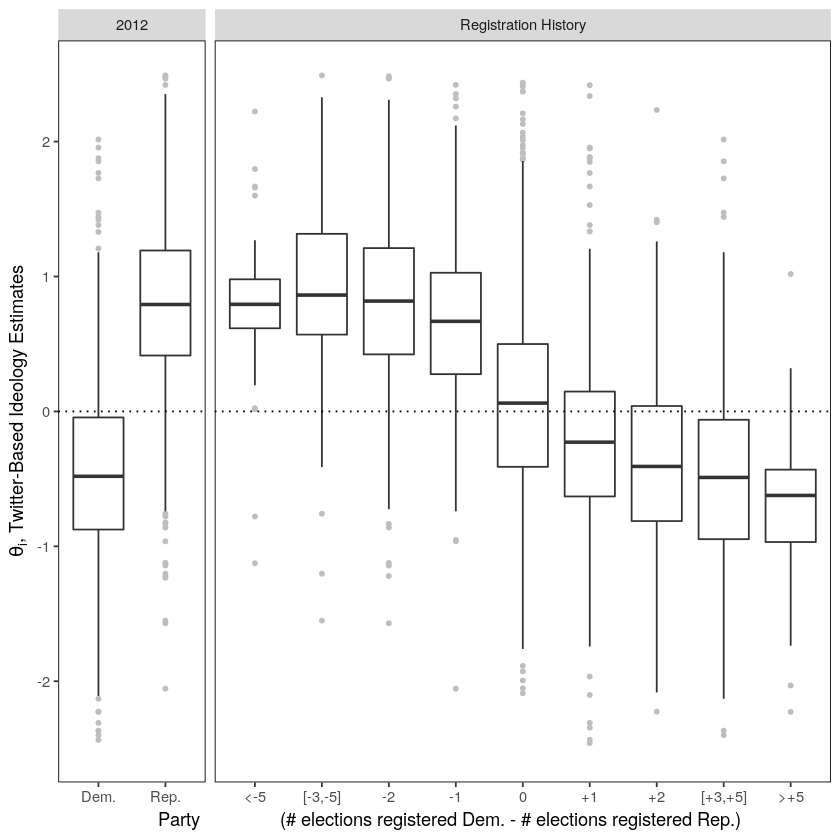

In [149]:
### figure 5

p <- ggplot(plotdata, aes(x=x, y=estimates))
pq <- p + geom_boxplot(outlier.colour="grey", outlier.size=1) +
    scale_x_discrete("  Party                (# elections registered Dem. - # elections registered Rep.)") + 
    scale_y_continuous(expression(paste(theta[i], ", Twitter-Based Ideology Estimates")), limits=c(-2.5, 2.5)) +
        theme(panel.border=element_rect(fill=NA), panel.background = element_blank(), legend.position="none") +
    geom_hline(aes(yintercept=0), linetype=3) +
    facet_grid(~facet,scales="free", space="free")

pq

In [150]:
ggsave("box plot.png", plot = pq)

Saving 6.67 x 6.67 in image

Warning message:
“Removed 91 rows containing non-finite values (stat_boxplot).”


# Script 09, Section 5 Replication

### Figure 6

In [151]:
library(ggplot2)
library(scales)
library(reshape2)

## loading user estimates and data
load("Barbera/users-data-US.rdata")

## loading tweet counts
load("Barbera/tweet-counts.rdata")

## merging
results <- merge(users.tweets, users)

## preparing data for histogram
results$q <- cut(results$theta, breaks=seq(-3, 3, 0.05))
counts1 <- aggregate(results$obama, by=list(q=results$q), FUN=sum)
counts1$keyword <- 'Obama'
counts2 <- aggregate(results$romney, by=list(q=results$q), FUN=sum)
counts2$keyword <- 'Romney'
counts <- rbind(counts1, counts2)
counts$theta <- rep(seq(-(3-0.025), 3, 0.05), 2)

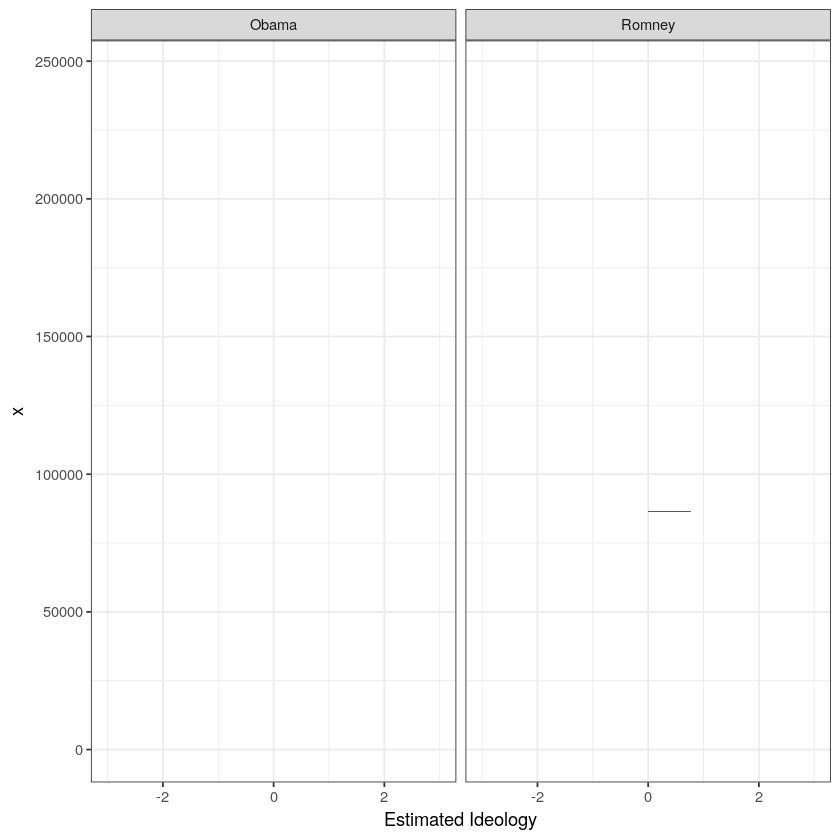

In [157]:
# Visual bug in the notebook is preventing the plot from showing
# replicated in R Studio and the visualization works
p <- ggplot(counts, aes(x=theta, y=x))
pq <- p + geom_bar(stat="identity") + 
		facet_wrap(~keyword,nrow=1) +
		scale_x_continuous("Estimated Ideology", limits=c(-3, 3)) + 
		scale_y_continuous("Count of Sent Tweets",
			breaks=c(0,50000,100000,150000,200000), 
			labels=c("0", "50K", "100K", "150K", "200K"),
			expand=c(0,0)) +
		theme_bw()
pq

In [153]:
ggsave("hist.png", plot = pq)

Saving 6.67 x 6.67 in image



### Figure 7

In [158]:
# loading retweets data
load("Barbera/retweets-data.rdata")

## loading user and elites estimates
load("Barbera/users-data-US.rdata")
load("Barbera/results-elites-US.rdata")
users <- users[,c("uid", "theta")]
results <- results[,c("screen_name", "phi")]
names(results) <- c("uid", "theta")
users <- rbind(users, results)

## merging with ideology estimates
names(users)[1] <- 'retweeter_uid'
retweets <- merge(retweets, users)
names(retweets)[4] <- "phat_y"
names(users)[1] <- 'retweeted_uid'
retweets <- merge(retweets, users)
names(retweets)[5] <- "phat_x"
	
## function to summarize data for heatmap
min <- -3
max <- 3
breaks <- 0.10

expand_data <- function(breaks=0.10, candidate, min=-3, max=3){
	x <- retweets$phat_x[retweets$candidate==candidate]
	y <- retweets$phat_y[retweets$candidate==candidate]	
	x <- (round((x - min) / breaks, 0) * breaks) + min
	y <- (round((y - min) / breaks, 0) * breaks) + min
	tab <- table(x, y)
	tab <- melt(tab)
	tab$prop <- tab$value/sum(tab$value)
	tab$candidate <- candidate
	return(tab)
}

obamaxy <- expand_data(breaks=0.20, candidate="Obama")
romneyxy <- expand_data(breaks=0.20, candidate="Romney")
xy <- rbind(obamaxy, romneyxy)

In [159]:
## quantities reported in paper
sum(xy$prop[xy$x<0 & xy$y<0 & xy$candidate=="Obama"])
sum(xy$prop[xy$x<0 & xy$y<0 & xy$candidate=="Romney"])

sum(xy$prop[xy$x>0 & xy$y>0 & xy$candidate=="Obama"])
sum(xy$prop[xy$x>0 & xy$y>0 & xy$candidate=="Romney"])

tw <- sum(xy$value[xy$y<(-0.5)])
sum(xy$value[xy$y<(-0.5) & xy$x>(-0.5)])/tw

tw <- sum(xy$value[xy$y>(0.5)])
sum(xy$value[xy$y>(0.5) & xy$x<(0.5)])/tw

[1] 0.1925084

[1] 0.4735251

[1] 0.682492

[1] 0.3078365

[1] 0.4530732

[1] 0.1161483

Warning message:
“Removed 1377 rows containing missing values (geom_tile).”


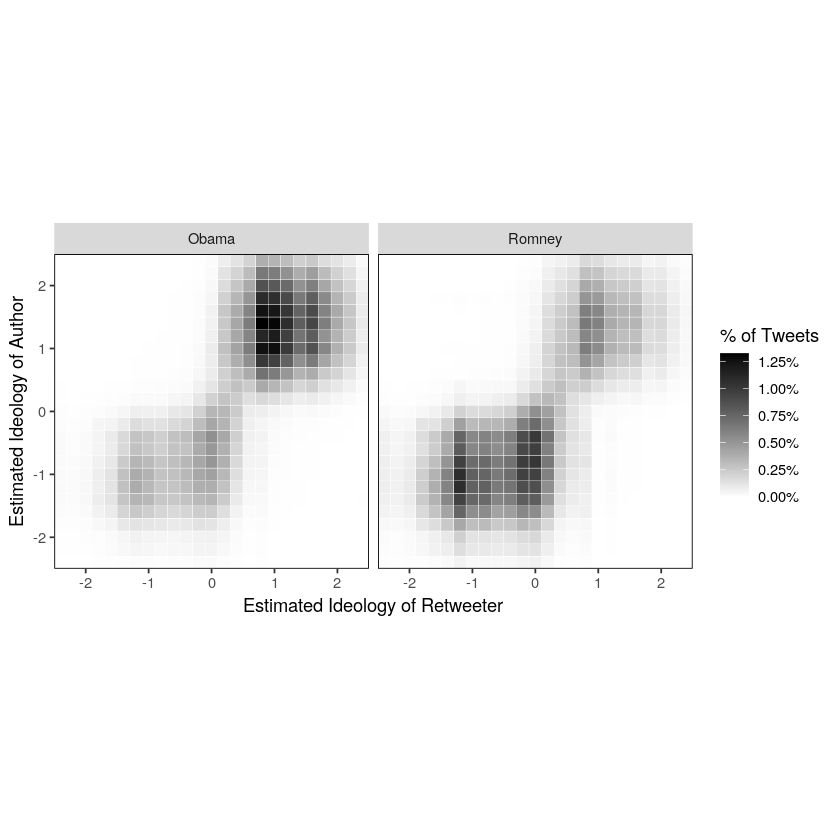

In [160]:
p <- ggplot(xy, aes(x, y))
pq <- p + geom_tile(aes(fill=prop), colour="white") + scale_fill_gradient(name="% of Tweets", 
		low = "white", high = "black", labels=percent_format()) +  
		labs(x="Estimated Ideology of Retweeter", y="Estimated Ideology of Author") + 
		scale_y_continuous(expand=c(0,0), breaks=(-2:2), limits=c(-2.5, 2.5)) +
		scale_x_continuous(expand=c(0,0), breaks=(-2:2), limits=c(-2.5, 2.5)) +
		facet_grid(. ~ candidate) + 
     	theme(panel.border=element_rect(fill=NA), panel.background = element_blank()) +
     	coord_equal()
pq

In [162]:
ggsave("heatmap.png", plot = pq)

Saving 6.67 x 6.67 in image

Warning message:
“Removed 1377 rows containing missing values (geom_tile).”
